In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn import metrics
from sklearn.metrics import r2_score,confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import dataset
data = pd.read_csv('melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.shape

(13580, 21)

In [4]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
## data preprocessing
# droping instant and dteday columns
data = data.drop(columns=['Date'],axis=1)

In [6]:
data.shape

(13580, 20)

In [7]:
data.size

271600

In [8]:
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13518 non-null  float64
 12  Landsize       13580 non-null  float64
 13  BuildingArea   7130 non-null   float64
 14  YearBuilt      8205 non-null   float64
 15  CouncilArea    12211 non-null  object 
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

In [9]:
#  checking null value in dataset
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [10]:
# How to fill null value
data.dropna(inplace=True)

In [11]:
#  checking null value in dataset
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Value Counts

In [12]:
data['Suburb'].value_counts()

Reservoir         154
Richmond          138
Brunswick         124
Bentleigh East    106
Coburg            102
                 ... 
Healesville         1
St Helena           1
Albanvale           1
Chirnside Park      1
Skye                1
Name: Suburb, Length: 287, dtype: int64

In [13]:
data['Rooms'].value_counts()

3    2541
2    1730
4    1278
1     329
5     281
6      28
7       6
8       3
Name: Rooms, dtype: int64

In [14]:
data['Type'].value_counts()

h    4088
u    1506
t     602
Name: Type, dtype: int64

In [15]:
data['Method'].value_counts()

S     3957
SP     898
PI     757
VB     543
SA      41
Name: Method, dtype: int64

In [16]:
data['SellerG'].value_counts()

Nelson           763
Jellis           638
hockingstuart    535
Barry            403
Marshall         313
                ... 
Weston             1
Bullen             1
Johnston           1
Compton            1
Only               1
Name: SellerG, Length: 203, dtype: int64

In [17]:
data['Distance'].value_counts()

11.2    352
9.2     185
7.8     179
13.9    160
5.2     134
       ... 
17.5      1
41.0      1
47.4      1
27.7      1
32.3      1
Name: Distance, Length: 192, dtype: int64

In [18]:
data['Bathroom'].value_counts()

1.0    3284
2.0    2365
3.0     463
4.0      64
5.0      15
6.0       3
8.0       1
7.0       1
Name: Bathroom, dtype: int64

In [19]:
data['Car'].value_counts()

1.0     2724
2.0     2468
0.0      431
3.0      304
4.0      213
5.0       26
6.0       21
7.0        5
8.0        2
10.0       1
9.0        1
Name: Car, dtype: int64

In [20]:
data['Bedroom2'].value_counts()

3.0    2549
2.0    1783
4.0    1225
1.0     338
5.0     261
6.0      27
0.0       5
7.0       4
9.0       3
8.0       1
Name: Bedroom2, dtype: int64

In [21]:
data['CouncilArea'].value_counts()

Moreland             658
Boroondara           576
Moonee Valley        504
Darebin              433
Glen Eira            426
Maribyrnong          401
Yarra                339
Port Phillip         336
Stonnington          335
Banyule              279
Melbourne            241
Bayside              223
Hobsons Bay          220
Brimbank             193
Monash               175
Manningham           150
Whitehorse           139
Kingston             111
Hume                  97
Whittlesea            89
Wyndham               47
Knox                  42
Melton                42
Maroondah             35
Frankston             30
Greater Dandenong     21
Nillumbik             18
Casey                 16
Yarra Ranges          10
Macedon Ranges         5
Cardinia               5
Name: CouncilArea, dtype: int64

In [22]:
data['Regionname'].value_counts()

Southern Metropolitan         2166
Northern Metropolitan         1854
Western Metropolitan          1392
Eastern Metropolitan           571
South-Eastern Metropolitan     157
Eastern Victoria                23
Northern Victoria               19
Western Victoria                14
Name: Regionname, dtype: int64

In [23]:
corr = data.corr()
corr['Price'].sort_values(ascending = False)

Price            1.000000
Rooms            0.533505
BuildingArea     0.530574
Bedroom2         0.514561
Bathroom         0.503922
Car              0.261507
Longtitude       0.211760
Postcode         0.125539
Landsize         0.081419
Propertycount   -0.046410
Distance        -0.148867
Lattitude       -0.213574
YearBuilt       -0.304633
Name: Price, dtype: float64

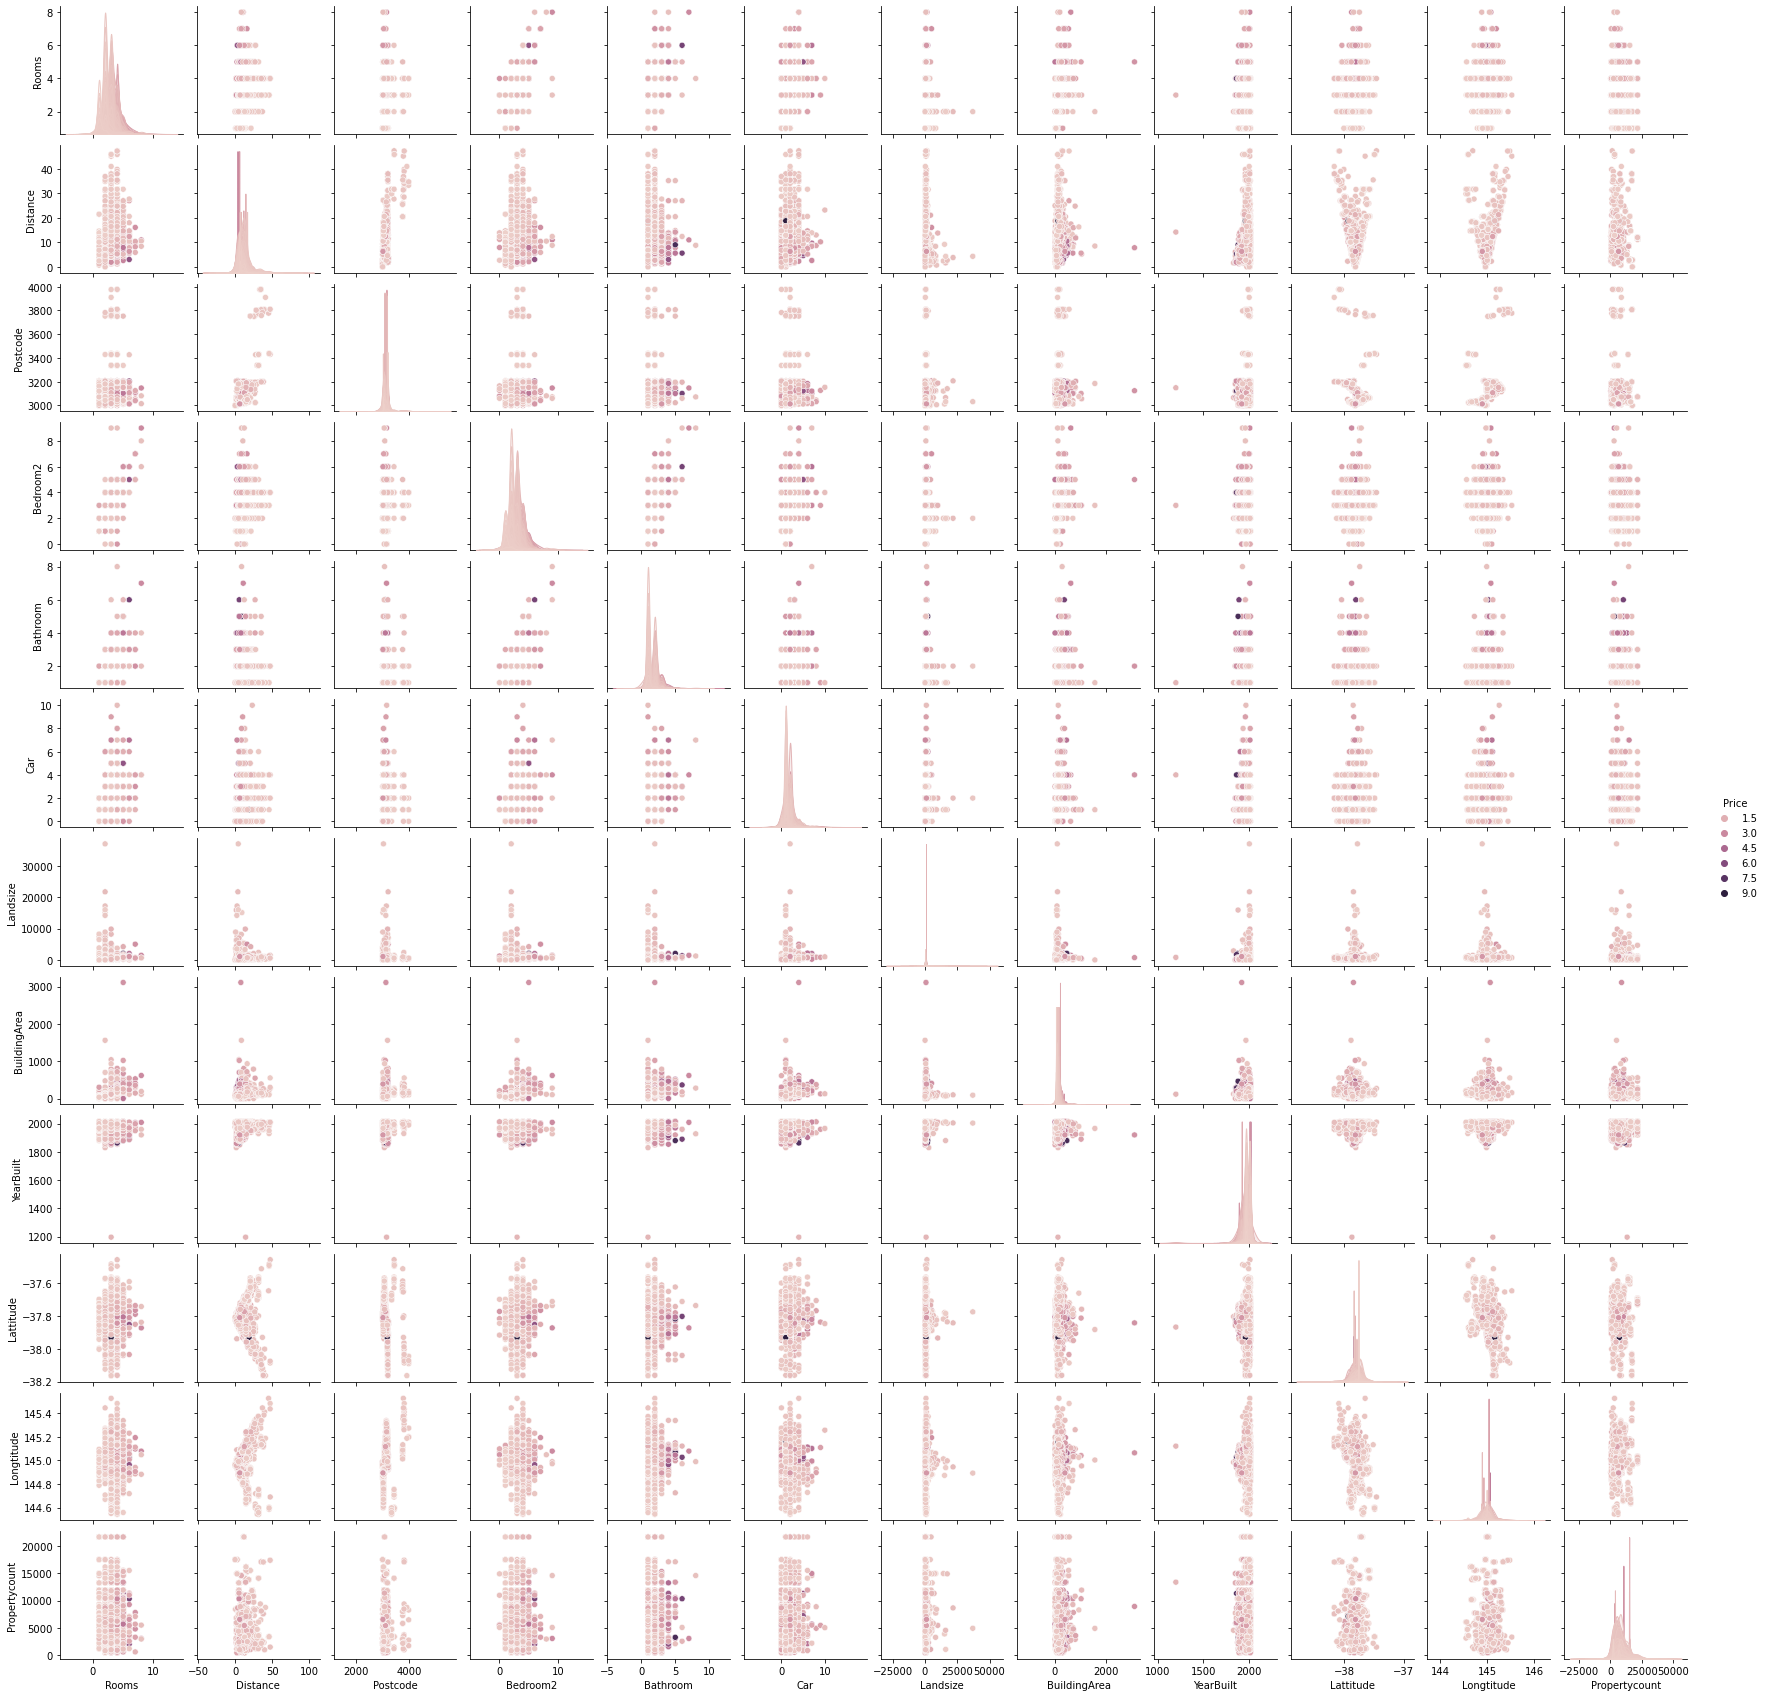

In [24]:
# pair plot
sns.pairplot(data,hue='Price',size=2)

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'Postcode'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>,
        <AxesSubplot:title={'center':'Landsize'}>],
       [<AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>],
       [<AxesSubplot:title={'center':'Propertycount'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

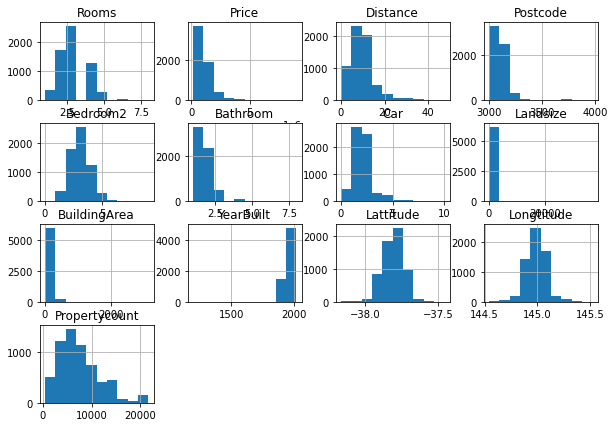

In [25]:
data.hist(figsize=(10,7))

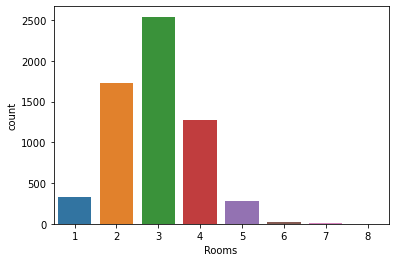

In [26]:
sns.countplot(data['Rooms'])
plt.show()

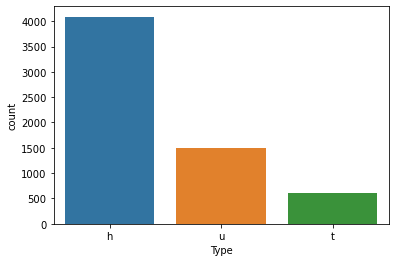

In [27]:
sns.countplot(data['Type'])
plt.show()

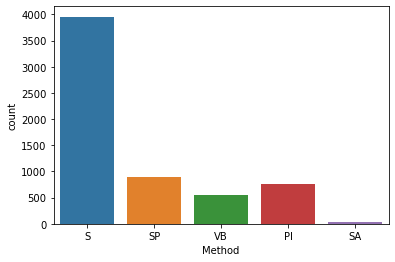

In [28]:
sns.countplot(data['Method'])
plt.show()

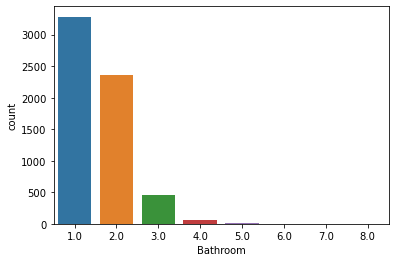

In [29]:
sns.countplot(data['Bathroom'])
plt.show()

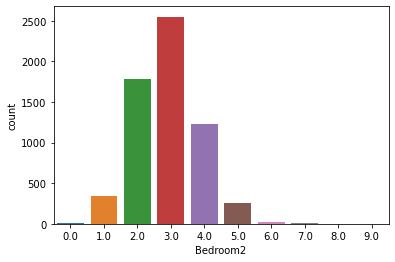

In [30]:
sns.countplot(data['Bedroom2'])
plt.show()

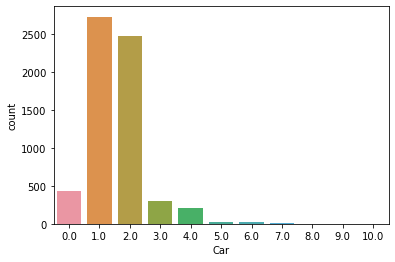

In [31]:
sns.countplot(data['Car'])
plt.show()

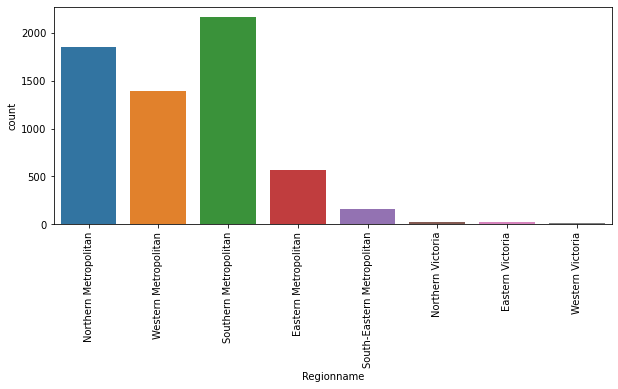

In [32]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data['Regionname'])
plt.xticks(rotation =90,fontsize =10)
plt.show()

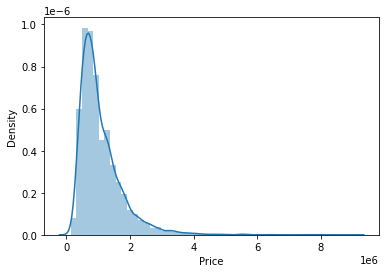

In [33]:
sns.distplot(data['Price'])
plt.show()

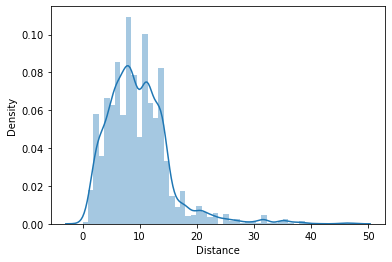

In [34]:
sns.distplot(data['Distance'])
plt.show()

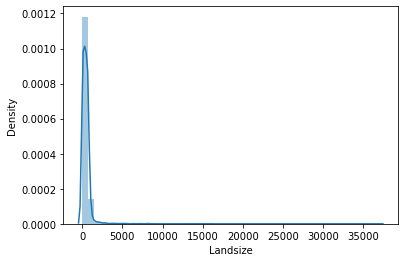

In [35]:
sns.distplot(data['Landsize'])
plt.show()

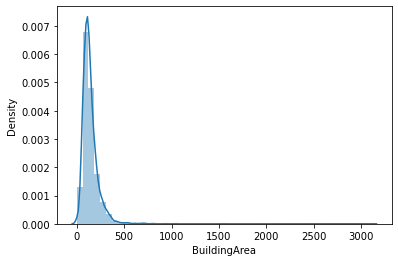

In [36]:
sns.distplot(data['BuildingArea'])
plt.show()

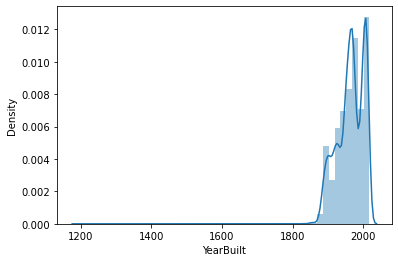

In [37]:
sns.distplot(data['YearBuilt'])
plt.show()

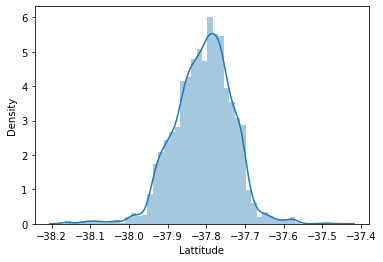

In [38]:
sns.distplot(data['Lattitude'])
plt.show()

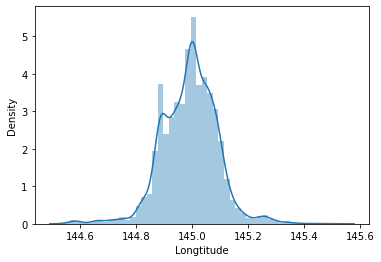

In [39]:
sns.distplot(data['Longtitude'])
plt.show()

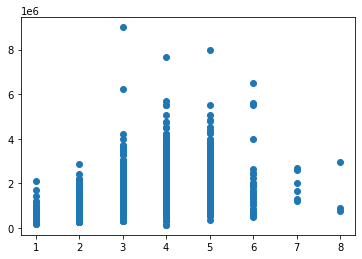

In [40]:
plt.scatter(data['Rooms'],data['Price'])

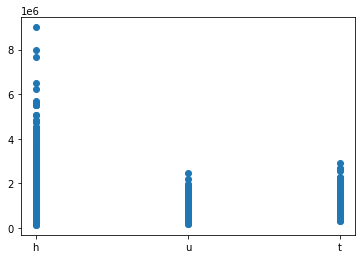

In [41]:
plt.scatter(data['Type'],data['Price'])

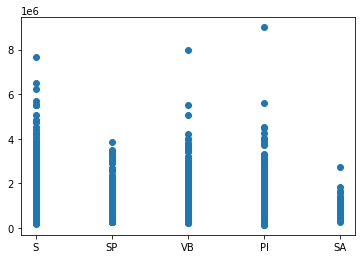

In [42]:
plt.scatter(data['Method'],data['Price'])

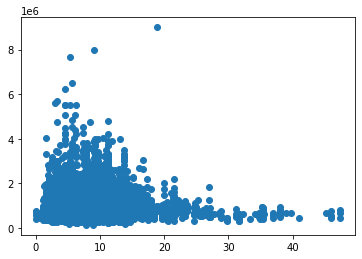

In [43]:
plt.scatter(data['Distance'],data['Price'])

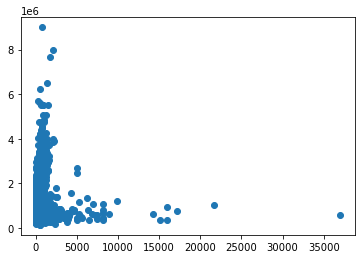

In [44]:
plt.scatter(data['Landsize'],data['Price'])

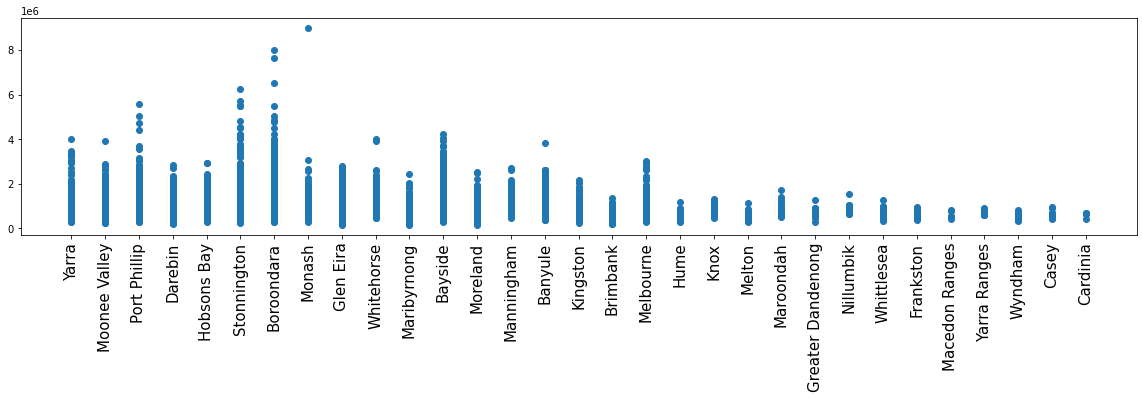

In [45]:
fig, ax = plt.subplots(figsize=(20,4))
plt.xticks(rotation =90,fontsize =15)
plt.scatter(data['CouncilArea'],data['Price'])

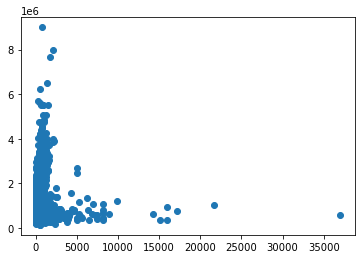

In [46]:
plt.scatter(data['Landsize'],data['Price'])

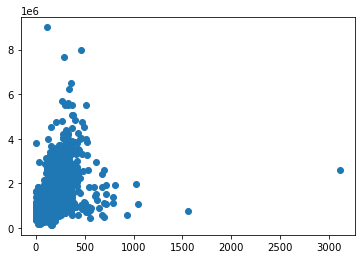

In [47]:
plt.scatter(data['BuildingArea'],data['Price'])

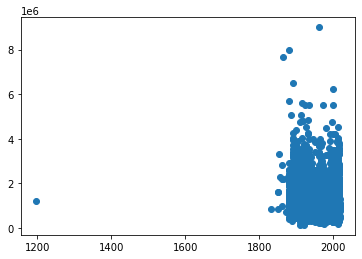

In [48]:
plt.scatter(data['YearBuilt'],data['Price'])

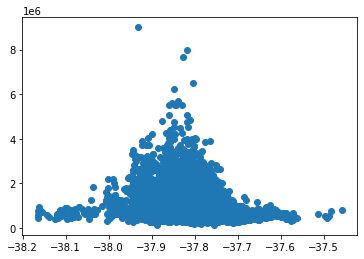

In [49]:
plt.scatter(data['Lattitude'],data['Price'])

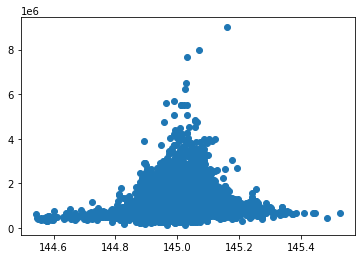

In [50]:
plt.scatter(data['Longtitude'],data['Price'])

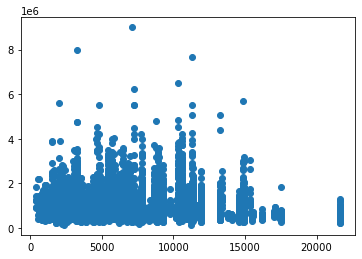

In [51]:
plt.scatter(data['Propertycount'],data['Price'])

<AxesSubplot:>

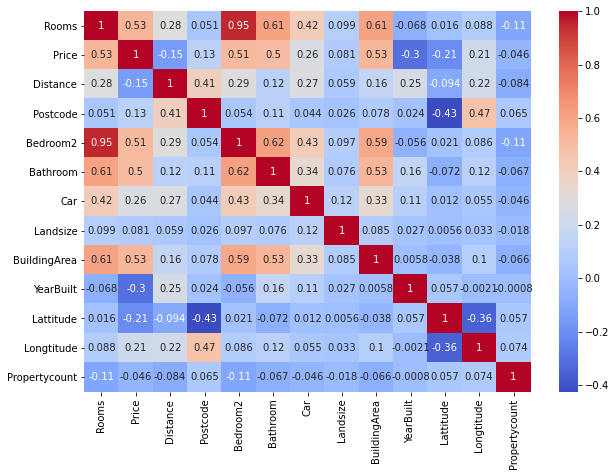

In [52]:
# heat map
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [53]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [54]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,0,2790,2,0,1035000.0,1,18,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,29,-37.8079,144.9934,2,4019.0
2,0,4520,3,0,1465000.0,3,18,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,29,-37.8093,144.9944,2,4019.0
4,0,4882,4,0,1600000.0,4,112,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,29,-37.8072,144.9941,2,4019.0
6,0,1027,3,0,1876000.0,1,112,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,29,-37.8024,144.9993,2,4019.0
7,0,6101,2,0,1636000.0,1,112,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,29,-37.8060,144.9954,2,4019.0


## Data preprocessing & ML Model

In [55]:
# treain_test_split
x = data.drop(columns=['Price'])
y = data['Price']

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [57]:
x_train.shape

(4337, 19)

In [58]:
x_test.shape

(1859, 19)

In [59]:
# LinearRegression 
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.5337663789093674

In [60]:
y_test

9811    1275000.0
6117     640000.0
620     1388800.0
5353     900000.0
6583     501000.0
          ...    
5683    1100000.0
6256    1428888.0
200      675000.0
396     1415000.0
9084     600000.0
Name: Price, Length: 1859, dtype: float64

In [61]:
y_predict

array([1315843.93339255,  454579.68416166, 1748207.39891204, ...,
        886559.52781248, 1279835.07671326,  567041.24596918])

In [62]:
pd.crosstab(y_test,y_predict)

col_0,-1.220216e+06,-1.088081e+06,-5.598018e+05,-4.852644e+05,-3.604153e+05,-3.512243e+05,-2.698285e+05,-1.961590e+05,-1.881197e+05,-1.587762e+05,...,2.864910e+06,2.889715e+06,2.904015e+06,3.169821e+06,3.185180e+06,3.459981e+06,3.543909e+06,4.141889e+06,4.167902e+06,8.747982e+06
Price,,,,,,,,,,,,,,,,,,,,,
145000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5510000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


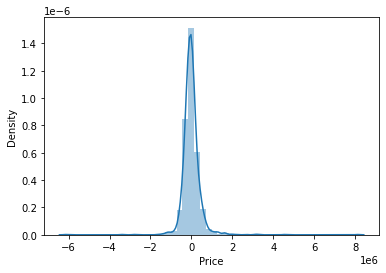

In [63]:
sns.distplot(y_test-y_predict)
plt.show()

In [64]:
# DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.5445924525388901

In [65]:
y_predict

array([1435000.,  700000., 1590000., ...,  579000., 1564000.,  640000.])

In [66]:
pd.crosstab(y_test,y_predict)

col_0,131000.0,200000.0,248500.0,257500.0,266000.0,275000.0,280000.0,281000.0,286000.0,290000.0,...,3730000.0,3900000.0,4000000.0,4011000.0,4200000.0,4225000.0,4240000.0,5600000.0,5700000.0,7650000.0
Price,,,,,,,,,,,,,,,,,,,,,
145000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210000.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5510000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


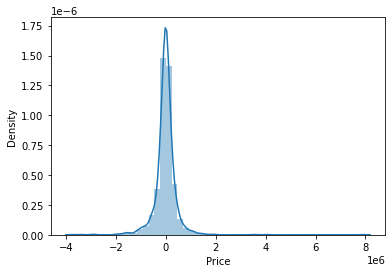

In [67]:
sns.distplot(y_test-y_predict)
plt.show()

In [68]:
# ExtraTreeRegressor
model = ExtraTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.48411720013186177

In [69]:
y_predict

array([ 825000.,  740000., 1572000., ...,  975000., 1680000.,  455000.])

In [70]:
pd.crosstab(y_test,y_predict)

col_0,170000.0,216000.0,227000.0,240000.0,248500.0,250000.0,260000.0,275000.0,279500.0,280000.0,...,3812000.0,4000000.0,4011000.0,4050000.0,4200000.0,4225000.0,4500000.0,4850000.0,6500000.0,7650000.0
Price,,,,,,,,,,,,,,,,,,,,,
145000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185000.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200000.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
210000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220000.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5510000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


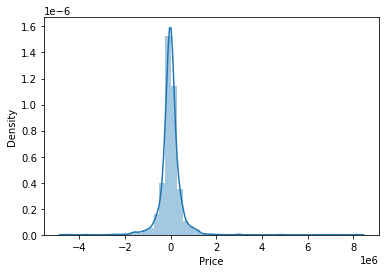

In [71]:
sns.distplot(y_test-y_predict)
plt.show()

In [72]:
# RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.7569361510801695

In [73]:
y_predict

array([1532670.  ,  606585.36, 1943727.  , ...,  660265.  , 1510020.  ,
        599147.  ])

In [74]:
pd.crosstab(y_test,y_predict)

col_0,262370.00,286765.00,287165.00,290825.00,302395.00,302713.00,304940.00,305230.00,305465.00,307605.00,...,3429575.00,3550957.76,3569580.00,3608325.00,3701650.00,3931677.76,4135260.00,4284780.00,4836700.00,4863010.00
Price,,,,,,,,,,,,,,,,,,,,,
145000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210000.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5510000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


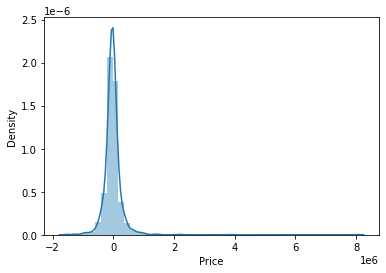

In [75]:
sns.distplot(y_test-y_predict)
plt.show()

In [76]:
# MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.09201749371377987

In [77]:
y_predict

array([1022083.79342941, 1049095.59945865, 1225056.26556712, ...,
       1043828.64102434, 1003914.16856276, 1183913.55614193])

In [78]:
pd.crosstab(y_test,y_predict)

col_0,6.703668e+05,6.851287e+05,6.862969e+05,6.884226e+05,6.908697e+05,7.089377e+05,7.186491e+05,7.212211e+05,7.351239e+05,7.396221e+05,...,1.744403e+06,1.849305e+06,2.002930e+06,2.047567e+06,2.047943e+06,2.466761e+06,2.655684e+06,2.823179e+06,3.100076e+06,4.051123e+06
Price,,,,,,,,,,,,,,,,,,,,,
145000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220000.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5510000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


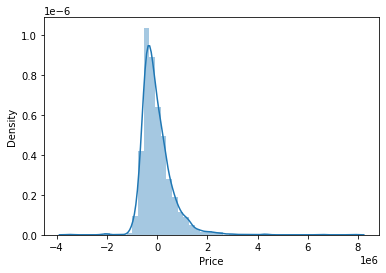

In [79]:
sns.distplot(y_test-y_predict)
plt.show()

In [80]:
# KNeighborsRegressor 
model = KNeighborsRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([1386200.,  952400., 1542400., ...,  443700., 1190200., 1153000.])

In [81]:
pd.crosstab(y_test,y_predict)

col_0,349700.0,391400.0,396300.0,397400.0,400800.0,421000.0,425000.0,429540.0,432200.0,432400.0,...,2650500.0,2680000.0,2773000.0,2789600.0,2800000.0,2880000.0,2889177.6,2981900.0,3252200.0,3647000.0
Price,,,,,,,,,,,,,,,,,,,,,
145000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220000.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5510000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


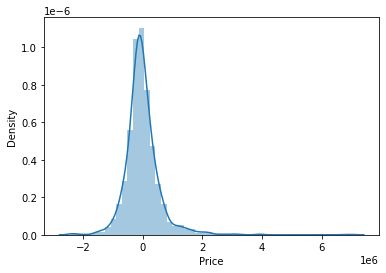

In [82]:
sns.distplot(y_test-y_predict)
plt.show()

In [83]:
# XGBRegressor
model =XGBRegressor(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.7688962844887824

In [84]:
y_predict

array([1299812.4 ,  544196.75, 1921141.5 , ...,  710258.56, 1349225.  ,
        508909.78], dtype=float32)

In [85]:
pd.crosstab(y_test,y_predict)

col_0,2.005596e+05,2.739055e+05,2.762699e+05,2.773564e+05,2.802643e+05,2.896110e+05,2.912518e+05,2.923461e+05,2.982077e+05,2.999963e+05,...,3.678034e+06,3.727374e+06,3.738100e+06,3.749790e+06,3.760862e+06,4.110839e+06,4.149190e+06,4.653968e+06,4.771762e+06,5.654784e+06
Price,,,,,,,,,,,,,,,,,,,,,
145000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185000.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
200000.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220000.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5500000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5510000.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


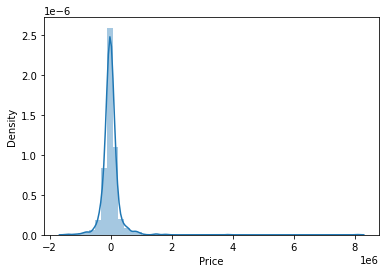

In [86]:
sns.distplot(y_test-y_predict)
plt.show()

In [87]:
# support victor machine ressor
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

-0.36782171601395386

In [88]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({600000.0: 23, 1100000.0: 16, 800000.0: 15, 1300000.0: 14, 1200000.0: 14, 1050000.0: 14, 1250000.0: 13, 750000.0: 13, 520000.0: 12, 790000.0: 12, 500000.0: 12, 700000.0: 11, 890000.0: 11, 1000000.0: 11, 940000.0: 11, 900000.0: 10, 400000.0: 10, 770000.0: 10, 650000.0: 10, 840000.0: 10, 2000000.0: 10, 1350000.0: 10, 730000.0: 9, 510000.0: 9, 1210000.0: 9, 1150000.0: 9, 550000.0: 9, 780000.0: 9, 710000.0: 9, 640000.0: 8, 950000.0: 8, 930000.0: 8, 860000.0: 8, 480000.0: 8, 560000.0: 8, 870000.0: 8, 680000.0: 8, 1400000.0: 8, 910000.0: 8, 1700000.0: 7, 880000.0: 7, 740000.0: 7, 515000.0: 7, 970000.0: 7, 420000.0: 7, 1450000.0: 7, 645000.0: 7, 370000.0: 7, 540000.0: 7, 615000.0: 7, 1060000.0: 7, 435000.0: 7, 1025000.0: 7, 2050000.0: 7, 835000.0: 7, 725000.0: 6, 660000.0: 6, 670000.0: 6, 1425000.0: 6, 470000.0: 6, 505000.0: 6, 905000.0: 6, 920000.0: 6, 760000.0: 6, 570000.0: 6, 490000.0: 6, 450000.0: 6, 410000.0: 6, 1650000.0: 6, 810000.0: 6, 655000.0: 6, 2600000.0: 6, 1600000.0: 6, 

col_0,365000.0,435000.0,535000.0,580000.0,600000.0,610000.0,645000.0,650000.0,660000.0,720000.0,...,825000.0,1071888.0,1150000.0,1200000.0,1315000.0,1635000.0,1850000.0,1865000.0,1900000.0,2620000.0
Price,,,,,,,,,,,,,,,,,,,,,
145000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
185000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
200000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
210000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
220000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5500000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5510000.0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


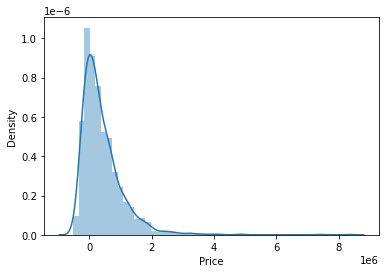

In [89]:
sns.distplot(y_test-y_predict)
plt.show()

In [90]:
# principle componet analysis
pca = PCA()
x = pd.DataFrame(pca.fit_transform(x))

In [91]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3416.894291,252.511896,-328.933813,-19.184885,-53.673080,-141.284634,-74.886905,61.386782,13.166679,-1.900855,1.883165,0.623189,0.699237,-0.668272,-0.606899,0.236076,0.042167,-0.006630,-0.028231
1,-3408.490449,-1477.657830,-350.340063,33.926144,-14.445271,-135.637724,-72.390971,57.980874,14.283701,-2.046729,1.935292,0.607940,-1.444625,-1.214335,-0.044808,0.493555,0.030133,0.004091,-0.030981
2,-3406.604026,-1839.338889,-364.353999,24.430286,-20.256175,-132.048011,22.483091,-55.885902,16.286847,-5.634694,2.129291,-0.749780,-2.776422,0.037708,-1.174995,-1.058698,-0.684919,-0.036888,-0.039808
3,-3425.935037,2015.171356,-238.863253,83.171494,29.446992,-122.928650,21.424640,56.837018,15.775967,-3.254753,2.045244,-0.082158,0.343748,-1.447548,0.063856,0.191290,0.751927,-0.002989,-0.023277
4,-3401.145862,-3058.481588,-228.810483,-7.072545,-44.220799,-139.852976,21.221980,65.318591,13.404040,-1.498801,2.026609,0.329887,0.541078,1.229701,-0.488320,0.146570,0.042018,-0.002280,-0.021725


In [92]:
pca.explained_variance_ratio_

array([8.26405294e-01, 1.37035659e-01, 3.53644823e-02, 3.85063928e-04,
       3.12789595e-04, 2.84363664e-04, 1.44260417e-04, 6.30913818e-05,
       3.67244312e-06, 9.87820375e-07, 1.64732875e-07, 5.98320737e-08,
       5.64924243e-08, 2.65778856e-08, 1.53470477e-08, 9.97991848e-09,
       1.97719315e-09, 2.87929236e-10, 1.01918227e-10])

<AxesSubplot:>

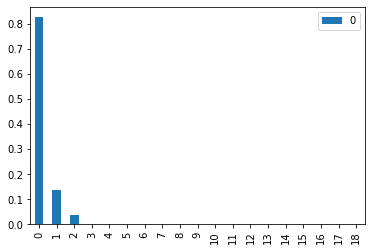

In [93]:
covid_var = pd.DataFrame(pca.explained_variance_ratio_)
covid_var.plot(kind = 'bar')

In [94]:
pca.explained_variance_ratio_[0:-1].sum()

0.9999999998980816

In [95]:
x = x.iloc[:,:-1]
x.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-3416.894291,252.511896,-328.933813,-19.184885,-53.673080,-141.284634,-74.886905,61.386782,13.166679,-1.900855,1.883165,0.623189,0.699237,-0.668272,-0.606899,0.236076,0.042167,-0.006630
1,-3408.490449,-1477.657830,-350.340063,33.926144,-14.445271,-135.637724,-72.390971,57.980874,14.283701,-2.046729,1.935292,0.607940,-1.444625,-1.214335,-0.044808,0.493555,0.030133,0.004091
2,-3406.604026,-1839.338889,-364.353999,24.430286,-20.256175,-132.048011,22.483091,-55.885902,16.286847,-5.634694,2.129291,-0.749780,-2.776422,0.037708,-1.174995,-1.058698,-0.684919,-0.036888
3,-3425.935037,2015.171356,-238.863253,83.171494,29.446992,-122.928650,21.424640,56.837018,15.775967,-3.254753,2.045244,-0.082158,0.343748,-1.447548,0.063856,0.191290,0.751927,-0.002989
4,-3401.145862,-3058.481588,-228.810483,-7.072545,-44.220799,-139.852976,21.221980,65.318591,13.404040,-1.498801,2.026609,0.329887,0.541078,1.229701,-0.488320,0.146570,0.042018,-0.002280


# RMSE,MSE,MAE

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 494177.428725121
MSE: 618164472567.6589
RMSE: 786234.3623676461


In [97]:
# RMSE/(max(DV)-min(DV))

786234.3623676461/(max(y)-min(y))

0.08864971951377225

In [98]:
metrics.r2_score(y_test, y_predict)

-0.36782171601395386

# Conclusion

In [99]:
#Dataframe for models
models = {"Linear Regression": LinearRegression(),
          "Random Forest": RandomForestRegressor(),
          "DecisionTree": DecisionTreeRegressor(),
          "ETR": ExtraTreeRegressor(),
          "KNN": KNeighborsRegressor(),
          "MPL": MLPRegressor(),
          "XGB": XGBRegressor(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [100]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.5337663789093674,
 'Random Forest': 0.7581643799073665,
 'DecisionTree': 0.528328888680347,
 'ETR': 0.5457470405837396,
 'KNN': 0.2199288098634017,
 'MPL': 0.10352012642432884,
 'XGB': 0.762082134578593,
 'SVM': 0.005917159763313609}

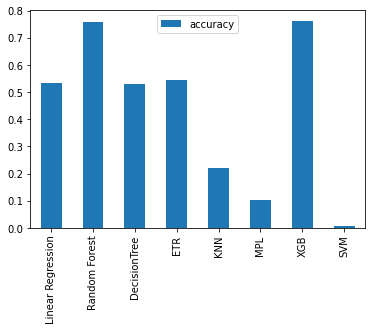

In [101]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();